# TUGAS ANALISIS DATA PENGENALAN KOMPUTASI KU1102-31

## Anggota Kelompok
<h3 style="text-align:center">Kelompok 13</h3>
  
| NIM | Nama |
| --- | --- |
| 16722047 | Jessica Budiman |  
| 16722052 | Delon Khaerun Alief |
| 16722117 | Yuba Felda Tustika |
| 16722167 | Selpia Anggraeni Permatasari |
| 16722292 | Maulida Rahma Britania |
    
<br>
<br>

<center> <img src="https://syeilendrapramuditya.files.wordpress.com/2021/01/gajah_itb_transparan_syeilendra.png" width=250>
<h1> FAKULTAS TEKNOLOGI INDUSTRI </h1>
<h1> INSTITUT TEKNOLOGI BANDUNG </h1>
<h1> 2022 </h1>

## Tema: Perusahaan Teknologi
### Deskripsi Data (TUGAS 3)

1. Sumber Dana Perusahaan Teknologi (sumber: [kaggle](https://www.kaggle.com/datasets/shivamb/tech-company-fundings-2020-onwards))
> Format: CSV  
> Ukuran: 305 KB  
> Dimensi: 3575 baris × 7 kolom

2. Penggabungan dan Akuisisi Perusahaan Teknologi (sumber: [kaggle](https://www.kaggle.com/datasets/shivamb/company-acquisitions-7-top-companies))
> Format: CSV  
> Ukuran: 102 KB  
> Dimensi: 1455 baris × 9 kolom

 Dataset yang digunakan pada tugas besar II analisis data ini adalah data mengenai penggabungan dan pemindahan kepelimilikan suatu perusahaan atau aset dari sebuah perusahaan teknologi. Pengumpulan dataset ini dilakukan oleh Shivam Bansal dengan bantuan dari sumbuer-sumber seperti TechCrunch, Wikipedia, dan CrunchBase. Dataset ini berisikan daftar penggabungan perusahaan yang dilakukan oleh perusahaan-perusahaan besar seperti Microsoft, Google, IBM, Hp, Apple, Amazon, Facebook, Twitter, eBay, Adobe, Citrix, Redhat, Blackberry, dan Disney.

 Dataset ini memuat bulan dan tahun terjadinya akuisisi, nama perusahaan yang diakuisisi, biaya akuisisi, jenis bisnis yang dijalankan oleh perusahaan yang diakuisisi, dan negara tempat akuisisi dilaksanakan. Dataset Merger and Acquisitions by Tech Companies ini diambil pada 21 November 2022. Dimensi dari dataset terdiri dari 1.455 baris dan 10 kolom, yaitu kolom id atau nomor data, parent company atau perusahaan yang mengakuisisi, acquisition year, acquisition month, acquired company, business, country, acquisition price, cateory, derived products. Dari total semua data yang disajikan, terdapat 28 data kosong pada acquisition year, 58 data kosong pada acquisition month, 274 data kosong pada business, 1114 data kosong pada country, 945 data kosong pada acquisition price, 1440 data kosong pada category, dan 1052 data kosong pada derived products. Format data Format dari data ini adalah CSV (Comma Separated Values), ini artinya daftar datayang disajikan dipisahkan oleh tanda koma. File CSV ini dirancang untuk menjadi caramudah megekspor data dan mengimpornya ke program lain. Data ini dapat dengan mudah dibaca oleh editor teks seperti Microsoft Excel. Ukuran file data yang digunakan ini adalah sebesar 102 KB.
  
#### Data yang akan dianalisis dan divisualisasikan
1. Dataset 1, Sumber Dana Perusahaan Teknologi
 - Perkembangan besar sumber dana perusahaan tiap bulan untuk masing-masing kategori (multiple line graph??? or whatever its name)
 - Jumlah kategori perusahaan teknologi pada tiap negara (stacked bar)
 - Kategori yang memiliki sumber dana terbesar (pie chart, the biggest one is exploded(?) i mean sedikit keluar gitu)
 - Jumlah sumber dana tiap tahap pendanaan tiap negara (horizontal stacked bar)
 - 10 perusahaan dengan sumber dana terbesar (horizontal bar, sorted, also show its category/vertical)
 - Besar jumlah sumber dana tiap kategori berdasarkan tahap pendanaan (scatter, the bigger, the larger the dot)
2. Dataset 2, Penggabungan dan Akuisisi Perusahaan Teknologi
 - Perbandingan jumlah perusahaan yang dibeli oleh perusahaan induk setiap tahun
 - Perbandingan jumpah akuisisi perusahaan untuk bisnis software dengan bisnis lainnya
 - Jumlah akuisisi perusahaan setiap tahun
 - Jumlah akuisisi perusahaan dari tahun ke tahun untuk perusahaan induk asal united states
 - Urutan jumlah akuisisi dari setiap perusahaan induk dari yang terbanyak
 - Urutan rata rata harga akuisisi perusahaan untuk setiap perusahaan induk
 - Hubungan antara harga akuisisi perusahaan dengan tahun akuisisi perusahaan
 - Hubungan antara harga akuisisi perusahaan dengan bulan akuisisi

# PENDAHULUAN
---
## Import dan membaca data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
data_funding = pd.read_csv('https://raw.githubusercontent.com/elonsquidion/tubes-analisis-data/main/tech_fundings.csv', index_col=0)
data_merger = pd.read_csv('https://raw.githubusercontent.com/elonsquidion/tubes-analisis-data/main/acquisitions_update_2021.csv', index_col=0)

## Karakteristik Data
### Dataset 1, Sumber Dana Perusahaan Teknologi
#### Penjelasan atribut/kolom, makna, jenis
- Index: Indeks (Numerikal)
- Company: Nama perusahaan (categorical-nominal)
- Website: situs perusahaan (categorical-nominal)
- Region: Lokasi Headquarter (manajemen eksekutif) perusahaan (company HQ) (categorical-nominal)
- Vertical: Bidang perusahaan (categorical-nominal)
- Funding amount: Total pembiayaan perusahaan (quantitative-discrete)
- Funding stage: Tingkatan pembiayaan perusahaan (categorical-nominal)
- Funding date: Tanggal pembiayaan perusahaan (time-series??????)

#### Penjelasan atribut kategorikal
- Company: Atribut company berisi nama-nama dari perusahaan
- Website: Atribut website berisi nama situs perusahaan
- Region: Atribut region berisi nama lokasi headquarter perusahaan
- Vertical: Atribut vertical berisi bidang perusahaan
- Funding Stage: Atribut funding stage terdiri dari beberapa kategori, yaitu pre-seed, seed, series A, series B, series C, series D, series E, series F, series G, series H, unknown, private equity, angel, debt financing, ICO, crowdfunding, initial coin offering, undisclosed, grant, funding, dan growth

#### Range nilai data pada atribut kuantitatif
- Funding Amount: Atribut funding amount berisi nilai pembiayaan perusahaan dalam range USD 16600000000	 s.d. USD 40000
- Funding Date: atribut funding date berisi tanggal pembiayaan perusahaan dari bulan Juni tahun 2020 sampai bulan September 2021

#### Persentase data yang kosong 
Dalam dataset ini, terdapat beberapa kategori data yang kosong, antara lain company 0%, website 0%, region 0%, funding amount 0,0025174825175%, funding stage 0,0179020979021%, dan funding date 0%.

### Dataset 2, Penggabungan dan Akuisisi Perusahaan Teknologi
#### Penjelasan atribut/kolom, makna, jenis
- Parent company: nama induk perusahaan (categorical-nominal)
- Acquisition Year: tahun bergabungnya kedua perusahaan (quantitative-continuous)
- Acquisition month: bulan bergabungnya kedua perusahaan (categorical-ordinal)
- Acquired company: nama perusahaan akuisisi (categorical-nominal)
- Business: jenis jasa/produk yang ditawarkan (categorical-nominal)
- Country: negara asal perusahaan (categorical-nominal)
- Acquisition price: total biaya pengeluaran untuk penggabungan perusahaan (quantitative-discrete)
- Category: kategori dari perusahaan (categorical-nominal)
- Derived products: produk turunan dari penggabungan kedua perusahaan (categorical-nominal)

#### Penjelasan atribut kategorikal
- Parent company: nama-nama dari induk perusahaan
- Acquisition month: Januari, Februari, Maret, April, Mei, Juni, July, Agustus, September, Oktober, November, Desember
- Acquired company: nama-nama dari perusahaan akuisisi
- Business: jenis jasa/produk yang ditawarkan
- Country: negara asal perusahaan-perusahaan
- Category: kategori dari perusahaan
- Derived products: hasil produk turunan dari penggabungan kedua perusahaan

#### Range nilai data pada atribut kuantitatif
- Acquisition Year: tahun dimana kedua perusahaan bergabung Pada data ini perusahaan bergabung dengan perusahaan induk pada range tahun 1957-2021
- Acquisition price: total biaya pengeluaran untuk menggabungkan perusahaan. Pada data ini biaya yang dikeluarkan adalah sekitar 10.000.000-970.000.000

#### Persentase data yang kosong
Dalam dataset ini, terdapat beberapa data yang kosong seperti Acquisition Year 1,92439863%, Acquisition Month 3,9862543%, Business 18,8316151%,  Country 76,5635739%, Acquisition Price 64,9484536%, Category 99,3127148%, Derived Products 72,3024055%




# Data Cleaning
---
### Mengecek tipe data tiap tiap kolom yang ada pada dataset yang dianggap oleh program

In [3]:
print("Nama-nama kolom pada dataset 1: ")
kolom1 = list(data_funding.columns)
kolom2 = list(data_merger.columns)
for index in range(len(kolom1)):
    print(str(index+1) + ". " + str(kolom1[index]) + " (" + str(data_funding.dtypes[str(kolom1[index])]) + ")")
print()
print("Nama-nama kolom pada dataset 2: ")
for index in range(len(kolom2)):
    print(str(index+1) + ". " + str(kolom2[index]) + " (" + str(data_merger.dtypes[str(kolom2[index])]) + ")")

Nama-nama kolom pada dataset 1: 
1. Company (object)
2. Website (object)
3. Region (object)
4. Vertical (object)
5. Funding Amount (USD) (object)
6. Funding Stage (object)
7. Funding Date (object)

Nama-nama kolom pada dataset 2: 
1. Parent Company (object)
2. Acquisition Year (object)
3. Acquisition Month (object)
4. Acquired Company (object)
5. Business (object)
6. Country (object)
7. Acquisition Price (object)
8. Category (object)
9. Derived Products (object)


## Dataset 2

### Kekotoran Dataset 2
#### Dataset 2, Penggabungan dan Akuisisi Perusahaan Teknologi
Berdasarkan data yang akan dianalisis dan divisualisasikan, dilakukan data cleansing dengan cara menghapus baris yang mengandung data kosong pada kategori: Acquisition Year, Acquisition Price, Business, dan Acquisition Month, mengganti data kosong pada kategori Country menjadi "Others", serta mengubah tipe data Acquisition Year dan Acquisition Price dari string menjadi integer. Ini dilakukan untuk menghilangkan data-data yang tidak diperlukan dalam menganalisis data, mempermudah pengelompokan data, dan juga agar plot data dapat dilakukan. Setelah dilakukannya data cleansing, jumlah baris berkurang dari 1455 baris menjadi 285 baris.


In [5]:
data_merger.drop(data_merger.loc[data_merger['Acquisition Year'] == "-"].index, inplace=True)
data_merger['Acquisition Year'] = data_merger['Acquisition Year'].astype(int)
data_merger['Country'] = data_merger['Country'].replace(["-"], ["Others"])
data_merger.drop(data_merger.loc[data_merger['Acquisition Price'] == "-"].index, inplace=True)
data_merger.drop(data_merger.loc[data_merger['Acquisition Price'] == "undisclosed"].index, inplace=True)
data_merger['Acquisition Price'] = data_merger['Acquisition Price'].astype(int)
data_merger.drop(data_merger.loc[data_merger['Business'] == "-"].index, inplace=True)
data_merger.drop(data_merger.loc[data_merger['Acquisition Month'] == "-"].index, inplace=True)
data_merger

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
6,Apple,1997,Feb,NeXT,Unix-like hardware and software platform,Others,404000000,-,-
7,Apple,1997,Sep,Power Computing Corporation,Macintosh clones,Others,110000000,-,-
8,Apple,1999,Jan,Xemplar Education,Software,Others,4926000,-,-
9,Apple,1999,Nov,Raycer Graphics,Computer graphic chips,Others,15000000,-,-
15,Apple,2001,Jul,Spruce Technologies,Graphics software,Others,14900000,-,-
...,...,...,...,...,...,...,...,...,...
1373,Redhat,2012,Dec,ManageIQ,Orchestration software,Others,104000000,-,-
1375,Redhat,2014,Apr,Inktank Storage,Ceph,Others,175000000,-,-
1376,Redhat,2014,Jun,eNovance,OpenStack Integration Services,Others,95000000,-,-


# Statistik
---
## Statistik Dataset 2
### Sampel Data

In [28]:
data_merger[:10]

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
6,Apple,1997,2,NeXT,Others,Others,404000000,-,-
7,Apple,1997,9,Power Computing Corporation,Others,Others,110000000,-,-
8,Apple,1999,1,Xemplar Education,Software,Others,4926000,-,-
9,Apple,1999,11,Raycer Graphics,Others,Others,15000000,-,-
15,Apple,2001,7,Spruce Technologies,Others,Others,14900000,-,-
16,Apple,2001,12,PowerSchool,Others,Others,66100000,-,-
17,Apple,2002,2,Nothing Real,Others,Others,15000000,-,-
18,Apple,2002,4,Zayante,Others,Others,13000000,-,-
19,Apple,2002,6,Silicon Grail Corp-Chalice,Others,Others,20000000,-,-


### Statistik pada dataset 2

In [51]:
numericData2 = ["Acquisition Year", "Acquisition Price"]
for i in range(len(numericData2)):
    data = numericData2[i]
    print(str(i+1) + ". " + data)
    print("Rata-rata: " + str(data_merger[data].mean()))
    print("Standar Deviasi: " + str(data_merger[data].std()))
    print("Min: " + str(data_merger[data].min()))
    print("10%: " + str(data_merger[data].quantile(0.10)))
    print("25%: " + str(data_merger[data].quantile(0.25)))
    print("50%: " + str(data_merger[data].quantile(0.50)))
    print("75%: " + str(data_merger[data].quantile(0.75)))
    print("90%: " + str(data_merger[data].quantile(0.90)))
    print("Max: " + str(data_merger[data].max()))
    print("Distribusi Nilai Frekuensi:")
    print(f"\t{str(data_merger[data].min())} - {str((data_merger[data].quantile(0.10)))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].min()) & (data_merger[data] < data_merger[data].quantile(0.10))]))} data")
    print(f"\t{str(data_merger[data].quantile(0.10))} - {str((data_merger[data].quantile(0.25)))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].quantile(0.10)) & (data_merger[data] < data_merger[data].quantile(0.25))]))} data")
    print(f"\t{str(data_merger[data].quantile(0.25))} - {str((data_merger[data].quantile(0.50)))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].quantile(0.25)) & (data_merger[data] < data_merger[data].quantile(0.50))]))} data")
    print(f"\t{str(data_merger[data].quantile(0.50))} - {str((data_merger[data].quantile(0.75)))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].quantile(0.50)) & (data_merger[data] < data_merger[data].quantile(0.75))]))} data")
    print(f"\t{str(data_merger[data].quantile(0.75))} - {str((data_merger[data].quantile(0.90)))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].quantile(0.50)) & (data_merger[data] < data_merger[data].quantile(0.75))]))} data")
    print(f"\t{str(data_merger[data].quantile(0.90))} - {str((data_merger[data].max()))} = {str(len(data_merger[(data_merger[data] >= data_merger[data].quantile(0.90)) & (data_merger[data] < data_merger[data].max())]))} data")
    print()

1. Acquisition Year
Rata-rata: 2008.5894736842106
Standar Deviasi: 6.391832492277958
Min: 1987
10%: 2000.0
25%: 2004.0
50%: 2010.0
75%: 2013.0
90%: 2016.6
Max: 2021
Distribusi Nilai Frekuensi:
	1987 - 2000.0 = 24 data
	2000.0 - 2004.0 = 44 data
	2004.0 - 2010.0 = 69 data
	2010.0 - 2013.0 = 66 data
	2013.0 - 2016.6 = 66 data
	2016.6 - 2021 = 26 data

2. Acquisition Price
Rata-rata: 1155661596.491228
Standar Deviasi: 4503035484.898652
Min: 450000
10%: 17914800.0
25%: 50000000.0
50%: 151000000.0
75%: 480000000.0
90%: 1459999999.9999995
Max: 50100000000
Distribusi Nilai Frekuensi:
	450000 - 17914800.0 = 29 data
	17914800.0 - 50000000.0 = 41 data
	50000000.0 - 151000000.0 = 72 data
	151000000.0 - 480000000.0 = 71 data
	480000000.0 - 1459999999.9999995 = 71 data
	1459999999.9999995 - 50100000000 = 28 data



**Kesimpulan:** Data tertua yang dimiliki adalah pada tahun 1987, sedangkan yang terbaru pada tahun 2021. Data dominan berasal dari tahun persentil 25% (2004) hingga tahun persentil 50% (2010). Selain itu, pada harga akuisisi memiliki harga terendah yaitu 450000 dan harga tertinggi 50100000000 dengan rata-rata harga sekitar 1155661596.5. Standar deviasi pada data harga akuisisi cukup besar yang menandakan perbedaan harga dari satu harga ke harga lainnya cukup besar.

# Visualisasi
---
## Visualisasi Dataset 2 (TUGAS 6)

### Dataset 2, Penggabungan dan Akuisisi Perusahaan Teknologi

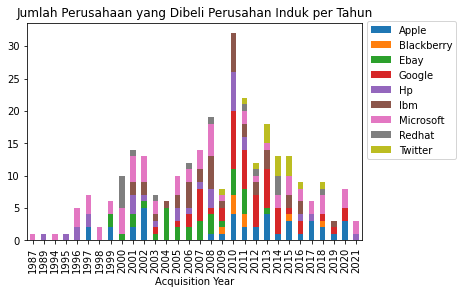

In [6]:
# Perbandingan jumlah perusahaan yang dibeli oleh perusahaan induk setiap tahun (stacked bar chart)

ax = data_merger.groupby(["Acquisition Year", "Parent Company"]).size().unstack().plot(kind="bar", stacked=True,title="Jumlah Perusahaan yang Dibeli Perusahan Induk per Tahun")
ax.legend(bbox_to_anchor=(1, 1.03), loc='upper left')

plt.show()

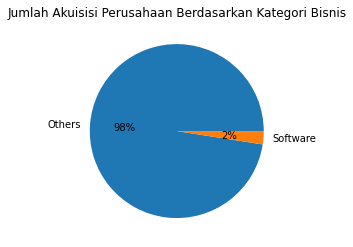

In [7]:
# Perbandingan jumlah akuisisi perusahaan untuk bisnis Software dengan bisnis lainnya (pie chart)

data_merger_pie = data_merger
data_merger_pie['Business'] = np.where(data_merger_pie["Business"]!="Software","Others", data_merger_pie["Business"])

data_merger_pie["Business"].value_counts().plot(kind="pie", ylabel='', title="Jumlah Akuisisi Perusahaan Berdasarkan Kategori Bisnis", autopct='%1.0f%%')
plt.show()

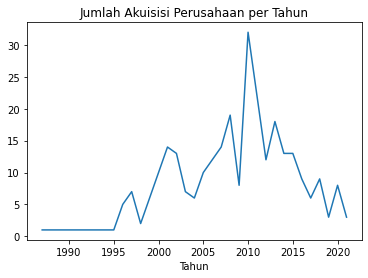

In [8]:
# Jumlah akuisisi perusahaan setiap tahun (line chart)

data_merger["Acquisition Year"].value_counts().sort_index().plot(kind="line", title="Jumlah Akuisisi Perusahaan per Tahun", xlabel='Tahun')
plt.show()

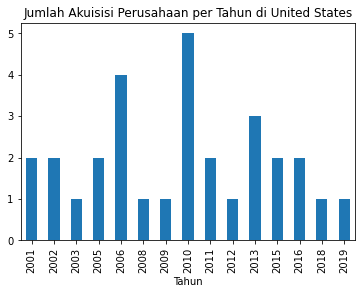

In [9]:
# Jumlah akuisisi perusahaan dari tahun ke tahun untuk perusahaan induk asal United States (bar chart)

data_us = data_merger.loc[data_merger["Country"]=="United States"]

data_us["Acquisition Year"].value_counts().sort_index().plot(kind="bar", title="Jumlah Akuisisi Perusahaan per Tahun di United States", xlabel='Tahun')

plt.show()

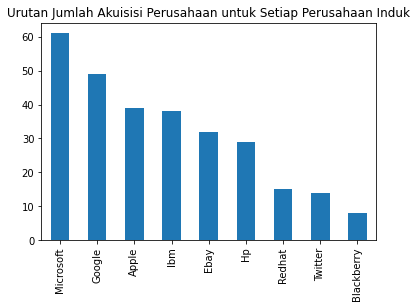

In [10]:
# Urutan jumlah akuisisi dari setiap perusahaan induk dari yang terbanyak (bar chart)

data_merger["Parent Company"].value_counts().plot(kind="bar", title="Urutan Jumlah Akuisisi Perusahaan untuk Setiap Perusahaan Induk")

plt.show()

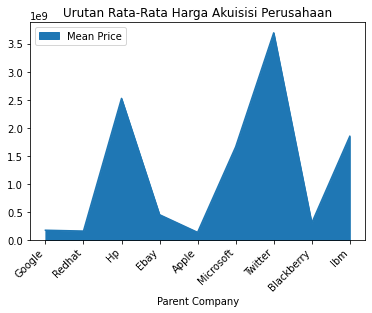

In [11]:
# Urutan rata-rata harga akuisisi perusahaan untuk setiap perusahaan induk (area chart)

list_company = list(set(data_merger["Parent Company"].tolist()))
data_C = []
for company in list_company:
    mean_price = data_merger["Acquisition Price"][data_merger["Parent Company"] == company].mean()
    data_C.append([company, mean_price]) 

df3 = pd.DataFrame(data_C, columns = ["Parent Company", "Mean Price"])
df3.plot(kind="area", x = "Parent Company" , y = "Mean Price", title="Urutan Rata-Rata Harga Akuisisi Perusahaan")
plt.xticks(rotation=45, ha='right')

plt.show()

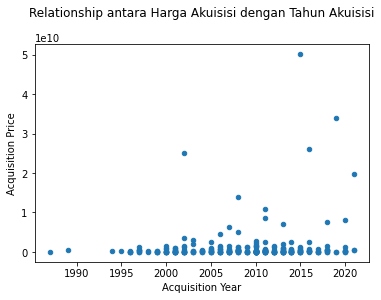

In [12]:
# Hubungan antara harga akuisisi perusahaan dengan tahun akuisisi perusahaan (scatter plot)

data_merger.plot(kind="scatter", x="Acquisition Year", y="Acquisition Price")

plt.title("Relationship antara Harga Akuisisi dengan Tahun Akuisisi", x=0.5, y=1.1)

plt.show()

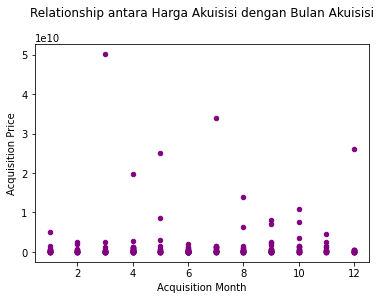

In [13]:
# Hubungan antara harga akuisisi perusahaan dengan bulan akuisisi (scatter plot)

data_merger_scatter = data_merger
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Jan",1, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Feb",2, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Mar",3, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Apr",4, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="May",5, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Jun",6, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Jul",7, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Aug",8, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Sep",9, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Oct",10, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Nov",11, data_merger_scatter["Acquisition Month"])
data_merger_scatter['Acquisition Month'] = np.where(data_merger_scatter["Acquisition Month"]=="Dec",12, data_merger_scatter["Acquisition Month"])

data_merger_scatter.plot(kind="scatter", x="Acquisition Month", y="Acquisition Price", color="purple")

plt.title("Relationship antara Harga Akuisisi dengan Bulan Akuisisi", x=0.5, y=1.1)

plt.show()

## Korelasi Dataset 2 (TUGAS 7)
### Dataset 2, Penggabungan dan Akuisisi Perusahaan Teknologi
Akan dicari apakah harga akuisisi perusahaan memiliki korelasi dengan perkembangan waktu dalam tahun. Berdasarkan analisis di bawah ini, didapatkan bahwa keduanya tidak berkorelasi. Hal ini ditunjukkan dengan nilai korelasi yang mendekati 0.

0.1422078083509967


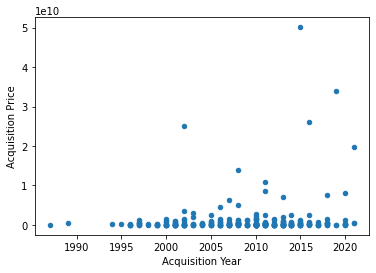

In [14]:
# Korelasi antara harga akuisisi perusahaan dengan perkembangan waktu dalam tahun

print(data_merger["Acquisition Year"].corr(data_merger["Acquisition Price"]))
data_merger.plot(kind="scatter", x="Acquisition Year", y="Acquisition Price")

plt.show()

#ANALISIS DATASET 1

In [15]:
data_funding

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20
...,...,...,...,...,...,...,...
3571,Headout,https://www.headout.com,United States,Travel,12000000,Series B,Sep-21
3572,OLIO,https://olioex.com/,United Kingdom,Wellness,43000000,Series B,Sep-21
3573,Trees for Life,https://treesforlife.org.uk,United Kingdom,Wellness,2737468,Crowdfunding,Sep-21


## A. Data Cleansing dan Tingkat Kekotoran Dataset 1
### Dataset 1, Pembiayaan Perusahaan Teknologi
Berdasarkan data yang akan dianalisis dan divisualisasikan, dilakukan data cleansing dengan cara menghapus baris yang mengandung data kosong pada kolom: Funding Amount dan Funding Stage. Ini dilakukan untuk menghilangkan data-data yang tidak diperlukan dalam menganalisis data. Setelah dara cleansing dilakukan, jumlah baris berkurang dari 3575 baris menjadi 3505 baris.


In [16]:
#Data cleansing untuk dataset 1
data_funding.drop(data_funding.loc[data_funding['Funding Amount (USD)'] == "Unknown"].index, inplace=True)
data_funding.drop(data_funding.loc[data_funding['Funding Stage'] == "Unknown"].index, inplace=True)
data_funding


,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20
...,...,...,...,...,...,...,...
3571,Headout,https://www.headout.com,United States,Travel,12000000,Series B,Sep-21
3572,OLIO,https://olioex.com/,United Kingdom,Wellness,43000000,Series B,Sep-21
3573,Trees for Life,https://treesforlife.org.uk,United Kingdom,Wellness,2737468,Crowdfunding,Sep-21


  Data pada kolom Funding Amount (USD) bertipe integer. Agar data dapat diplot dan divisualisasikan, data pada kolom Funding Amount (USD) perlu diubah terlebih dahulu menjadi bentuk integer

In [17]:
data_funding = data_funding.astype({"Funding Amount (USD)": int})
data_funding

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20
...,...,...,...,...,...,...,...
3571,Headout,https://www.headout.com,United States,Travel,12000000,Series B,Sep-21
3572,OLIO,https://olioex.com/,United Kingdom,Wellness,43000000,Series B,Sep-21
3573,Trees for Life,https://treesforlife.org.uk,United Kingdom,Wellness,2737468,Crowdfunding,Sep-21


In [18]:
funding_terbesar = data_funding.sort_values(["Funding Amount (USD)"], ascending= False)
funding_10_terbesar = funding_terbesar[:10]
funding_10_terbesar

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
3567,WestConnex,https://www.westconnex.com.au/,Australia,Transportation,16600000000,Private Equity,Sep-21
3049,Databricks,https://databricks.com,United States,Artificial Intelligence,1600000000,Series H,Aug-21
2926,Articulate,https://www.articulate.com,United States,Education,1500000000,Series A,Jul-21
97,Gojek,https://www.gojek.io/,Indonesia,Food Delivery,1200000000,Series G,Mar-20
1997,Gopuff,https://www.gopuff.com,United States,Transportation,1150000000,Series G,Mar-21
2610,Celonis,https://www.celonis.com,Germany,Cloud Computing,1000000000,Series D,Jun-21
2490,Trade Republic,https://traderepublic.com,Germany,Investing,900000000,Series C,May-21
2834,FTX Exchange,https://ftx.com/,United States,Blockchain,900000000,Series B,Jul-21
2949,Revolut,https://www.revolut.com,United Kingdom,Finance,800000000,Series E,Jul-21


In [19]:
funding_terbesar

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
3567,WestConnex,https://www.westconnex.com.au/,Australia,Transportation,16600000000,Private Equity,Sep-21
3049,Databricks,https://databricks.com,United States,Artificial Intelligence,1600000000,Series H,Aug-21
2926,Articulate,https://www.articulate.com,United States,Education,1500000000,Series A,Jul-21
97,Gojek,https://www.gojek.io/,Indonesia,Food Delivery,1200000000,Series G,Mar-20
1997,Gopuff,https://www.gopuff.com,United States,Transportation,1150000000,Series G,Mar-21
...,...,...,...,...,...,...,...
1332,Justlearn,https://www.justlearn.com/,Denmark,Education,97960,Seed,Jan-21
3063,capslock,https://capslocknext.com/,Turkey,Audio,80000,Pre-Seed,Aug-21
1314,CohygienÄ,https://www.cohygiene.com/,India,Health Care,52000,Seed,Nov-20


##Kategori Perusahaan yang Memiliki Sumber Dana Terbesar

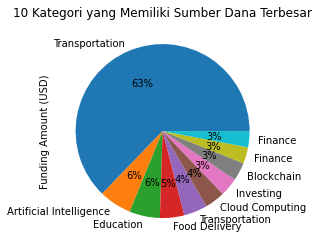

In [20]:
funding_pie = funding_10_terbesar[["Vertical", "Funding Amount (USD)"]]
funding_pie.plot(kind='pie', y = 'Funding Amount (USD)', labels = funding_pie["Vertical"], legend=False, autopct='%1.0f%%', title = "10 Kategori yang Memiliki Sumber Dana Terbesar")

##G. Sepuluh Perusahaan dengan Sumber Pendanaan Terbesar 

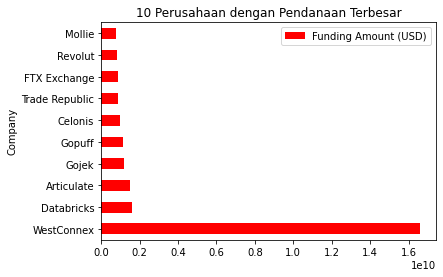

In [21]:
funding_10_terbesar.plot(kind="barh",x="Company",y="Funding Amount (USD)", title= "10 Perusahaan dengan Pendanaan Terbesar", color="red")

##Jumlah Kategori Perusahaan Teknologi pada Tiap Negara

In [22]:
data_funding["Region"].value_counts()


United States                 2002
United Kingdom                 307
India                          153
Canada                         108
Germany                         99
                              ... 
Malta                            1
Ghana                            1
Belize                           1
Slovakia (Slovak Republic)       1
Senegal                          1
Name: Region, Length: 72, dtype: int64

In [23]:
data_funding["Vertical"].value_counts()

B2B Software               613
Cloud Computing            283
Artificial Intelligence    280
Finance                    252
Blockchain                 239
                          ... 
Audio Tech                   1
Animation                    1
Design Software              1
Machine Learning             1
Building Construction        1
Name: Vertical, Length: 140, dtype: int64

In [24]:
df = data_funding.loc[(data_funding["Region"] == "United States") | (data_funding["Region"] == "United Kingdom") | (data_funding["Region"] == "India") | (data_funding["Region"] == "Germany") | (data_funding["Region"] == "Canada")]
df = df.loc[(df["Vertical"] == "B2B Software") | (df["Vertical"] == "Cloud Computing") | (df["Vertical"] == "Artificial Intelligence") | (df["Vertical"] == "Finance") | (df["Vertical"] == "Blockchain")]
df

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
index,,,,,,,
4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20
8,BeeCanvas,https://beecanvas.com/en,United States,B2B Software,1000000,Seed,Jan-20
9,SmartKarrot,https://www.smartkarrot.com/,United States,B2B Software,1000000,Angel,Jan-20
11,Fundraise Up,https://fundraiseup.com,United States,B2B Software,1250000,Seed,Jan-20
...,...,...,...,...,...,...,...
3466,Jeeves,https://www.tryjeeves.com/,United States,Finance,57000000,Series B,Sep-21
3467,Revenue Grid,https://revenuegrid.com,United States,Finance,20000000,Series A,Sep-21
3469,Built Technologies,https://getbuilt.com,United States,Finance,125000000,Series D,Sep-21


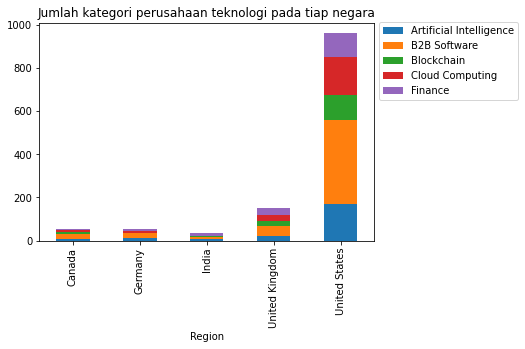

In [25]:
ax = df.groupby(["Region", "Vertical"]).size().unstack().plot(kind="bar", stacked=True,title="Jumlah kategori perusahaan teknologi pada tiap negara")
ax.legend(bbox_to_anchor=(1, 1.03), loc='upper left')

plt.show()

In [26]:
df2 = data_funding[["Funding Amount (USD)", "Vertical", "Funding Stage"]]
df2

,Funding Amount (USD),Vertical,Funding Stage
index,,,
1,278940,Blockchain,Seed
2,292244,Logistics,Seed
3,300000,Developer APIs,Seed
4,300000,Artificial Intelligence,Seed
5,529013,Artificial Intelligence,Seed
...,...,...,...
3571,12000000,Travel,Series B
3572,43000000,Wellness,Series B
3573,2737468,Wellness,Crowdfunding


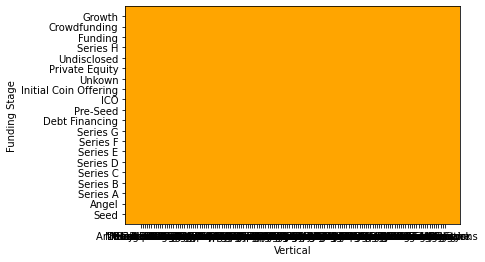

In [27]:
#failed
df2.plot(kind="scatter",x="Vertical", y="Funding Stage",sizes=df2["Funding Amount (USD)"], color="orange")